In [1]:
# Import everything

import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")


In [2]:
#Twitter API Login
log = pd.read_excel("login.xlsx")
key = log.values[0][0]
keySecret = log.values[1][0]
token = log.values[2][0]
access = log.values[3][0]
accessSecret = log.values[4][0]

client = tweepy.Client(token)


In [3]:
#Twitter ID: https://tweeterid.com/
#Twitter: https://twitter.com/home

post = client.get_users_tweets(id="50393960", tweet_fields=["text"])

for tweet in post.data:
    print(tweet)

Who better to recruit the next generation of clean tech innovators than Iron Man? https://t.co/QExn0CaLis
If we had stopped the COVID pandemic in less than 100 days, we could’ve saved over 98% of the lives lost. Here’s how we can prevent it from happening again: https://t.co/qsZHVFUi6d https://t.co/iMQNjqcZur
I have an obligation to return my resources to society in ways that have the greatest impact for reducing suffering and improving lives. And I hope others in positions of great wealth and privilege will step up in this moment too.
As I look to the future, I plan to give virtually all of my wealth to the foundation. I will move down and eventually off of the list of the world’s richest people.
Although the foundation bears our names, basically half our resources have come from Warren Buffett. His incredible generosity is a huge reason why the foundation has been able to be so ambitious. I can never adequately express how much I appreciate his friendship and guidance. https://t.co/a

In [4]:
# We create a pandas dataframe as follows:

listTweet = []

for tweet in post.data:

    listTweet.append(str(tweet))

df = pd.DataFrame([str(tweet) for tweet in post.data], columns=['Tweets'])
df


,Tweets
0,Who better to recruit the next generation of c...
1,If we had stopped the COVID pandemic in less t...
2,I have an obligation to return my resources to...
3,"As I look to the future, I plan to give virtua..."
4,"Although the foundation bears our names, basic..."
5,I am very proud of the foundation’s role in he...
6,"With the support and guidance of our board, we..."
7,Melinda and I started the @gatesfoundation in ...
8,But I’m still optimistic. These setbacks are h...
9,The pandemic is one of the biggest setbacks in...


In [5]:
# Clean Text

def cleanTXT(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", text) # Replace @mention
    text = re.sub(r"#", "", text) # Remove # symbol
    text = re.sub(r"RT[\s]+", "", text) # Remove RT
    text = re.sub(r"https?:\/\/\S+", "", text) # Remove hyperlinks
    return text

df["Tweets"] = df["Tweets"].apply(cleanTXT)
df


,Tweets
0,Who better to recruit the next generation of c...
1,If we had stopped the COVID pandemic in less t...
2,I have an obligation to return my resources to...
3,"As I look to the future, I plan to give virtua..."
4,"Although the foundation bears our names, basic..."
5,I am very proud of the foundation’s role in he...
6,"With the support and guidance of our board, we..."
7,Melinda and I started the in 2000 because we ...
8,But I’m still optimistic. These setbacks are h...
9,The pandemic is one of the biggest setbacks in...


In [6]:
# Create function to get subjectivity and polarity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

# Create two columns
df["Subjectivity"] = df["Tweets"].apply(getSubjectivity)
df["Polarity"] = df["Tweets"].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Who better to recruit the next generation of c...,0.400000,0.288889
1,If we had stopped the COVID pandemic in less t...,0.066667,-0.166667
2,I have an obligation to return my resources to...,0.875000,0.900000
3,"As I look to the future, I plan to give virtua...",0.206944,-0.077778
4,"Although the foundation bears our names, basic...",0.553571,0.273810
5,I am very proud of the foundation’s role in he...,0.450000,0.416667
6,"With the support and guidance of our board, we...",0.700000,0.050000
7,Melinda and I started the in 2000 because we ...,0.475000,0.387273
8,But I’m still optimistic. These setbacks are h...,0.275000,0.075000
9,The pandemic is one of the biggest setbacks in...,0.656250,0.125000


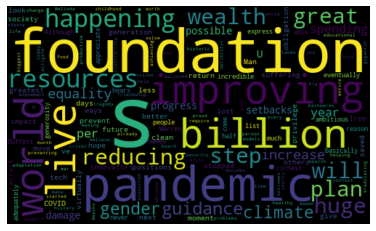

In [7]:
# Word Cloud
allWord = " ".join([twt for twt in df["Tweets"]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWord)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [8]:
# Positive/Negative Analysis

def getAnalysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

df["Analysis"] = df["Polarity"].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,Who better to recruit the next generation of c...,0.400000,0.288889,Positive
1,If we had stopped the COVID pandemic in less t...,0.066667,-0.166667,Negative
2,I have an obligation to return my resources to...,0.875000,0.900000,Positive
3,"As I look to the future, I plan to give virtua...",0.206944,-0.077778,Negative
4,"Although the foundation bears our names, basic...",0.553571,0.273810,Positive
5,I am very proud of the foundation’s role in he...,0.450000,0.416667,Positive
6,"With the support and guidance of our board, we...",0.700000,0.050000,Positive
7,Melinda and I started the in 2000 because we ...,0.475000,0.387273,Positive
8,But I’m still optimistic. These setbacks are h...,0.275000,0.075000,Positive
9,The pandemic is one of the biggest setbacks in...,0.656250,0.125000,Positive


In [9]:
# Print Positive Tweets
j=1
sortedDF = df.sort_values(by="Polarity")
for i in range (0, sortedDF.shape[0]):
    if (sortedDF["Analysis"][i] == "Positive"):
        print(str(j) + ") " + sortedDF["Tweets"][i] + "\n")
        j += 1


1) Who better to recruit the next generation of clean tech innovators than Iron Man? 

2) I have an obligation to return my resources to society in ways that have the greatest impact for reducing suffering and improving lives. And I hope others in positions of great wealth and privilege will step up in this moment too.

3) Although the foundation bears our names, basically half our resources have come from Warren Buffett. His incredible generosity is a huge reason why the foundation has been able to be so ambitious. I can never adequately express how much I appreciate his friendship and guidance. 

4) I am very proud of the foundation’s role in helping solve big problems like preventing pandemics, reducing childhood deaths, eradicating diseases, improving food security and climate adaptation, achieving gender equality, and improving educational outcomes.

5) With the support and guidance of our board, we plan to increase our spending from nearly $6 billion per year today to $9 billion 

In [10]:
# Print Negative Tweets
j=1
sortedDF = df.sort_values(by=["Polarity"], ascending=False)
for i in range (0, sortedDF.shape[0]):
    if (sortedDF["Analysis"][i] == "Negative"):
        print(str(j) + ") " + sortedDF["Tweets"][i] + "\n")
        j += 1

1) If we had stopped the COVID pandemic in less than 100 days, we could’ve saved over 98% of the lives lost. Here’s how we can prevent it from happening again:  

2) As I look to the future, I plan to give virtually all of my wealth to the foundation. I will move down and eventually off of the list of the world’s richest people.



Text(0, 0.5, 'Subjectivity')

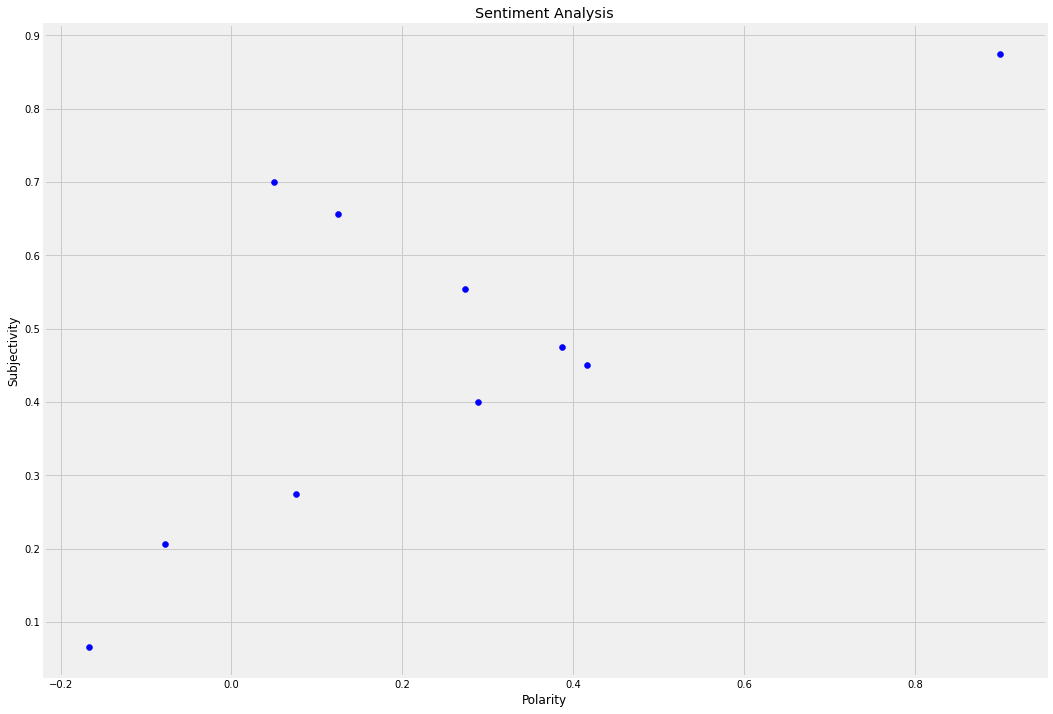

In [11]:
# Plot Polarity and Subjectivity
plt.figure(figsize=(16,12))
for i in range(0, df.shape[0]):
    plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color="Blue")

plt.title("Sentiment Analysis")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")

Precentage of positive tweets: 80.0%
Precentage of negative tweets: 20.0%


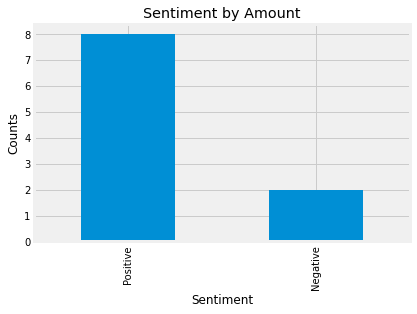

In [12]:
# Statistics of Positive/Negative

# Percentage
positiveMessage = df[df.Analysis == "Positive"]
positiveMessage = positiveMessage["Tweets"]
print("Precentage of positive tweets: " + str(round((positiveMessage.shape[0] / df.shape[0]) * 100, 1)) + "%")

negativeMessage = df[df.Analysis == "Negative"]
negativeMessage = negativeMessage["Tweets"]
print("Precentage of negative tweets: " + str(round((negativeMessage.shape[0] / df.shape[0]) * 100, 1)) + "%")

# Total Amount
df["Analysis"].value_counts()
plt.title("Sentiment by Amount")
plt.xlabel("Sentiment")
plt.ylabel("Counts")
df["Analysis"].value_counts().plot(kind="bar")
plt.show()